<a href="https://colab.research.google.com/github/ShivaKottha/Simulation-and-Modeling/blob/main/homework3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## The Uniform Distribution

Load libraries. We use the scipy.stats library.

In [ ]:
import scipy.stats as stats


Use scipy library to create a randam uniform distribution data (100000 numbers from 0 to 10)

In [ ]:
import scipy.stats as stats
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(42)
uniform_dist = stats.uniform(loc=0, scale=10)
data = uniform_dist.rvs(size=100000)

Plot the following density distribution.
You can use figsize=(9,9), xlim=(-1,11)

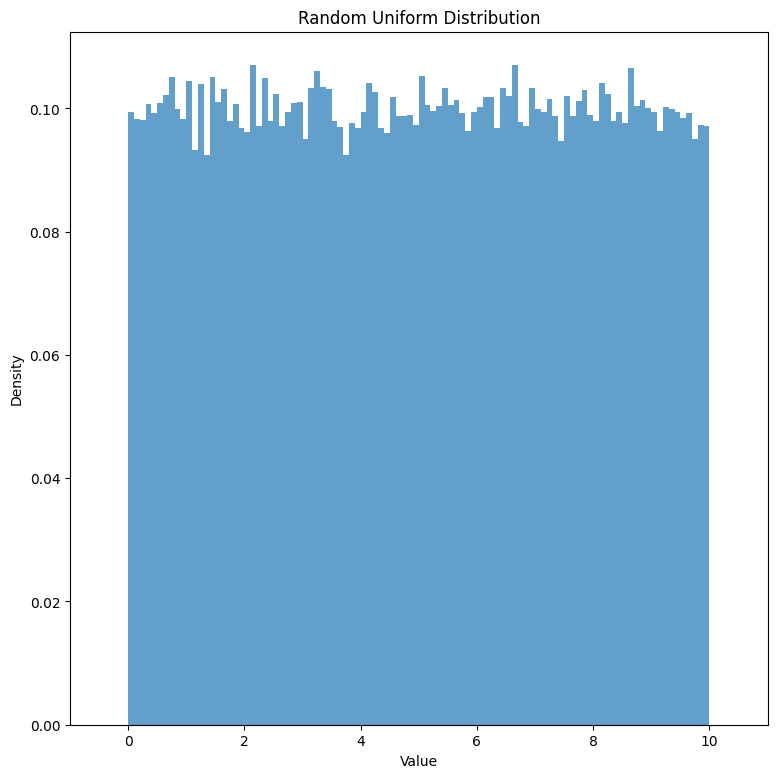

In [ ]:
#run the above code before
fig, ax = plt.subplots(figsize=(9, 9))
ax.hist(data, bins=100, density=True, alpha=0.7)
ax.set_xlim(-1, 11)
plt.xlabel('Value')
plt.ylabel('Density')
plt.title('Random Uniform Distribution')
plt.show()



Check scipy libraries and use useful functions.

cdf (cumulative distribution function) gives you the area under the distribution's density curve to the left of a certain value on the x axis. Calculate cdf with x axis from 0 to 2.5.

In [ ]:
import scipy.stats as stats
x = 2.5
cdf_value = stats.uniform.cdf(x, loc=0, scale=10)
print(cdf_value)

0.25


ppf() is the inverse of cdf(): it returns the x axis cutoff value (quantile) associated with a given probability. Caculate the cutoff value for propabality with 40%.

In [ ]:
import scipy.stats as stats
distribution = stats.uniform(loc=0, scale=10)
probability = 0.4
cutoff_value = distribution.ppf(probability)
print(cutoff_value)

4.0


Demonstrate for uniform distribution, x values within the range will have the same probability desity.  x values outside the range have a probability density of 0. The output is similar as the following.

In [ ]:
import scipy.stats as stats
loc = 0
scale = 10
x_values = [-1, 2, 5, 8, 11, 14]
distribution = stats.uniform(loc, scale - loc)
for x in x_values:
    density = distribution.pdf(x)
    print("Density at x value", x)
    print(density)

Density at x value -1
0.0
Density at x value 2
0.1
Density at x value 5
0.1
Density at x value 8
0.1
Density at x value 11
0.0
Density at x value 14
0.0


Probability distribution functions in scipy also support median(), mean(), var() and std().

## The Normal Distribution


Use scipy's norm to have normal distribution (see the graph below) .  The normal distribution has default vaues of  mean of 0 and standard deviation of 1. Investigate what percentage of data generated by a default normal distribution is below -1. What percentage of data generated is above 1 and what percentage lies between -1 and 1. Print the three percentages. The output is similar as the following.

In [ ]:
import scipy.stats as stats
mean = 0
std_dev = 1
distribution = stats.norm(loc=mean, scale=std_dev)
percentage_below_minus1 = distribution.cdf(-1)
percentage_above_1 = 1 - distribution.cdf(1)
percentage_between_minus1_and_1 = distribution.cdf(1) - distribution.cdf(-1)
print("Percentage below -1:", percentage_below_minus1)
print("Percentage above 1:", percentage_above_1)
print("Percentage between -1 and 1:", percentage_between_minus1_and_1)

Percentage below -1: 0.15865525393145707
Percentage above 1: 0.15865525393145707
Percentage between -1 and 1: 0.6826894921370859


Plotting is not required. The codes will be included in the solution. The image below shows the bell shape normal distribution.


print the ppf for 2.5% cutoff and 97.5% cutoff. The output is similar as the following

In [ ]:
import scipy.stats as stats
mean = 0
std_dev = 1
distribution = stats.norm(loc=mean, scale=std_dev)
ppf_2_5 = distribution.ppf(0.025)
ppf_97_5 = distribution.ppf(0.975)
print("ppf for 2.5% cutoff:", ppf_2_5)
print("ppf for 97.5% cutoff:", ppf_97_5)

ppf for 2.5% cutoff: -1.9599639845400545
ppf for 97.5% cutoff: 1.959963984540054


The quantile output above confirms that roughly 5% of the data lies more than 2 standard deviations from the mean.


## The Binomial Distribution

We will use binomial distribution to model coin flips. The scipy name for the binomial is binom. Here we set the number of flips per trial to 10,  the number of trials to 10000, and success probability to 0.5.

Create a random binomial distribution data "fair_coin_flips" in the code line below.

col_0   0    1    2     3     4     5     6     7    8   9   10
row_0                                                          
counts  10  110  439  1161  2024  2504  2025  1215  418  87   7


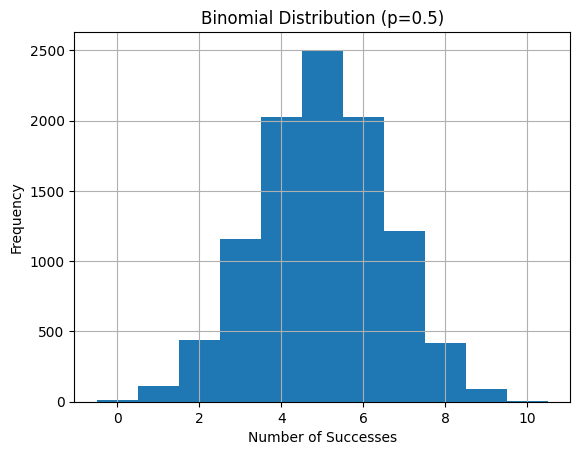

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
num_flips_per_trial = 10
num_trials = 10000
success_prob = 0.5
fair_coin_flips = stats.binom.rvs(n=num_flips_per_trial, p=success_prob, size=num_trials)
print(pd.crosstab(index="counts", columns=fair_coin_flips))
pd.DataFrame(fair_coin_flips).hist(range=(-0.5, 10.5), bins=11)
plt.xlabel("Number of Successes")
plt.ylabel("Frequency")
plt.title("Binomial Distribution (p=0.5)")
plt.show()

The histogram above shows us that a binomial distribution with a 50% probability of success is roughly symmetric, with the most likely outcomes lying at the center.
Change the success rate to 0.8, implement the codes similar as above to show the distribution won't be symmetric:

col_0   3   4    5    6     7     8     9     10
row_0                                           
counts  10  59  254  907  2060  2958  2659  1093


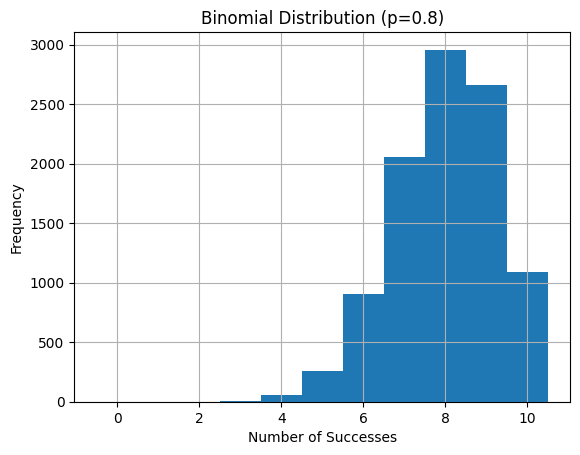

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
num_flips_per_trial = 10
num_trials = 10000
success_prob = 0.8
fair_coin_flips = stats.binom.rvs(n=num_flips_per_trial, p=success_prob, size=num_trials)
print(pd.crosstab(index="counts", columns=fair_coin_flips))
pd.DataFrame(fair_coin_flips).hist(range=(-0.5, 10.5), bins=11)
plt.xlabel("Number of Successes")
plt.ylabel("Frequency")
plt.title("Binomial Distribution (p=0.8)")
plt.show()

Continue from above binomial distribution(success rate=0.8), give the codes to get the probability of achieving 5 heads or less with 10 flips.

In [ ]:
import scipy.stats as stats
num_flips_per_trial = 10
success_prob = 0.8
prob_5_heads_or_less = stats.binom.cdf(5, num_flips_per_trial, success_prob)
print(prob_5_heads_or_less)

0.03279349759999997


Continue from above binomial distribution(success rate=0.8), give the codes to get the probability of achieving 9 heads or more with 10 flips.

In [ ]:
import scipy.stats as stats
num_flips_per_trial = 10
success_prob = 0.8
prob_9_heads_or_more = 1 - stats.binom.cdf(8, num_flips_per_trial, success_prob)
print(prob_9_heads_or_more)

0.37580963840000015


For continuous probability density functions, you use pdf() to check the probability density at a given x value. For discrete distributions like the binomial, use stats.distribution.pmf() (probability mass function) to check the mass (proportion of observations) at given number of successes k.
Write codes to give the probability density at 5 heads with success rate of 0.5 of 10 flips.

In [ ]:
import scipy.stats as stats
num_flips_per_trial = 10
success_prob = 0.5
prob_5_heads_density = stats.binom.pmf(5, num_flips_per_trial, success_prob)
print(prob_5_heads_density)

0.24609375000000003


What about the probability density at 8 heads with success rate of 0.8 of 10 flips?

In [ ]:
import scipy.stats as stats
num_flips_per_trial = 10
success_prob = 0.8
prob_8_heads_density = stats.binom.pmf(8, num_flips_per_trial, success_prob)
print(prob_8_heads_density)

0.30198988799999993


## Wrap Up

Extra information of Exponential Distributions and Poisson Distributions will be given in the solution.


Python's scipy library contains functions that make it easy to work with a wide range of probability distributions, including [many that we did not discuss](https://docs.scipy.org/doc/scipy/reference/stats.html) in this lesson. Probability distribution functions are useful for generating random data, modeling random events and aiding with statistical tests and analysis.
